In [67]:
import pandas as pd
import plotnine as p9
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx

import Data.cs_aarhus.util_data as ud


# Force figure and saved figure backgrounds to white
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['savefig.facecolor'] = 'white'


In [59]:
results_df = pd.read_csv('Data/cs_aarhus/cs_analysis_results.csv')

In [60]:
model_rename = {
    "true_net": "True",
    "MWG": "BG",
    "agg_or": "OR",
    "agg_and": "AND",
}

results_df["model"] = results_df["model"].replace(model_rename)
results_df["model"] = pd.Categorical(results_df["model"], categories=model_rename.values(), ordered=True)


layer_rename = {
    "facebook": "Facebook",
    "leisure": "Leisure",
    "lunch": "Lunch",
    "work": "Work",
}

results_df["layer"] = results_df["layer"].replace(layer_rename)
results_df["layer"] = pd.Categorical(results_df["layer"], categories=layer_rename.values(), ordered=True)


summary_df = (
    results_df
    .groupby(["layer", "model"])
    .agg(
        mean_RMSE_rel=("RMSE_rel", "mean"),
        mean_RMSE_rel_std=("RMSE_rel", "std"),
        rmse_rel_q5=("RMSE_rel", lambda x: np.percentile(x, 5)),
        rmse_rel_q95=("RMSE_rel", lambda x: np.percentile(x, 95)),

        mean_MAPE = ("MAPE", "mean"),
        median_MAPE = ("MAPE", "median"),
        mean_MAPE_std = ("MAPE", "std"),
        mape_q5 = ("MAPE", lambda x: np.percentile(x, 5)),
        mape_q95 = ("MAPE", lambda x: np.percentile(x, 95)),
       
       
        cover = ("covering", "mean"),
        ind_cover = ("mean_ind_cover", "mean"),

        w_dist = ("w_dist", "mean"),

        mean = ("mean", "mean"),
        median = ("median", "median"),
        std = ("std", "mean"),
        true = ("true", "mean"),
        true_std = ("true", "std"),

        mean_975 = ("q975", "mean"),
        mean_025 = ("q025", "mean"),

        bias = ("bias", "mean"),
        bias_std = ("bias", "std"),
        )
    .reset_index()
)

summary_df


C:\Users\bar21\AppData\Local\Temp\ipykernel_12860\1375891005.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,layer,model,mean_RMSE_rel,mean_RMSE_rel_std,rmse_rel_q5,rmse_rel_q95,mean_MAPE,median_MAPE,mean_MAPE_std,mape_q5,...,w_dist,mean,median,std,true,true_std,mean_975,mean_025,bias,bias_std
0,Facebook,True,0.050445,0.019392,0.030455,0.085025,0.032754,0.027965,0.021690,0.006839,...,0.773387,1.968457,1.530680,0.073805,1.973762,0.016250,2.112857,1.822987,-0.005305,0.075046
1,Facebook,BG,0.288783,0.111563,0.147309,0.501975,0.401927,0.370590,0.107885,0.279608,...,4.348995,2.216834,2.075505,0.390769,1.973762,0.016250,2.976111,1.502085,0.243073,0.385332
2,Facebook,OR,0.228015,0.089897,0.132250,0.397835,0.399898,0.373510,0.095735,0.294346,...,3.423786,2.088715,1.978455,0.301386,1.973762,0.016250,2.678067,1.494382,0.114953,0.357781
3,Facebook,AND,0.432572,0.096581,0.265149,0.591325,0.353564,0.327390,0.071224,0.282666,...,5.590872,1.140231,1.141150,0.175375,1.973762,0.016250,1.483799,0.795356,-0.833530,0.199180
4,Leisure,True,0.075181,0.029133,0.042480,0.131551,0.047956,0.040180,0.032731,0.009407,...,0.982684,1.507101,1.407155,0.081623,1.527920,0.010943,1.666789,1.346089,-0.020820,0.088195
5,Leisure,BG,0.194806,0.068208,0.108888,0.335627,0.167516,0.151605,0.051847,0.117828,...,2.872821,1.430527,1.363575,0.208788,1.527920,0.010943,1.851939,1.053284,-0.097393,0.207257
6,Leisure,OR,0.275692,0.123352,0.116778,0.495491,0.254189,0.212800,0.102721,0.159068,...,4.270131,1.228703,1.207640,0.197918,1.527920,0.010943,1.616663,0.839216,-0.299217,0.287248
7,Leisure,AND,0.248095,0.088977,0.106510,0.391898,0.229440,0.204340,0.070089,0.158329,...,4.204927,1.170395,1.175330,0.109779,1.527920,0.010943,1.385654,0.954375,-0.357524,0.148735
8,Lunch,True,0.053587,0.017886,0.032239,0.091787,0.031632,0.025630,0.022356,0.004755,...,0.725443,2.179829,2.073915,0.086144,2.186750,0.016807,2.348661,2.010204,-0.006921,0.086526
9,Lunch,BG,0.140703,0.059174,0.078672,0.252795,0.155999,0.145660,0.042441,0.113825,...,1.804456,2.032124,1.982005,0.192166,2.186750,0.016807,2.415408,1.676886,-0.154626,0.220918


c:\Users\bar21\.conda\envs\STAT\Lib\site-packages\plotnine\scales\scale_shape.py:82: PlotnineWarning: Using shapes for an ordinal variable is not advised.
c:\Users\bar21\.conda\envs\STAT\Lib\site-packages\plotnine\geoms\geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


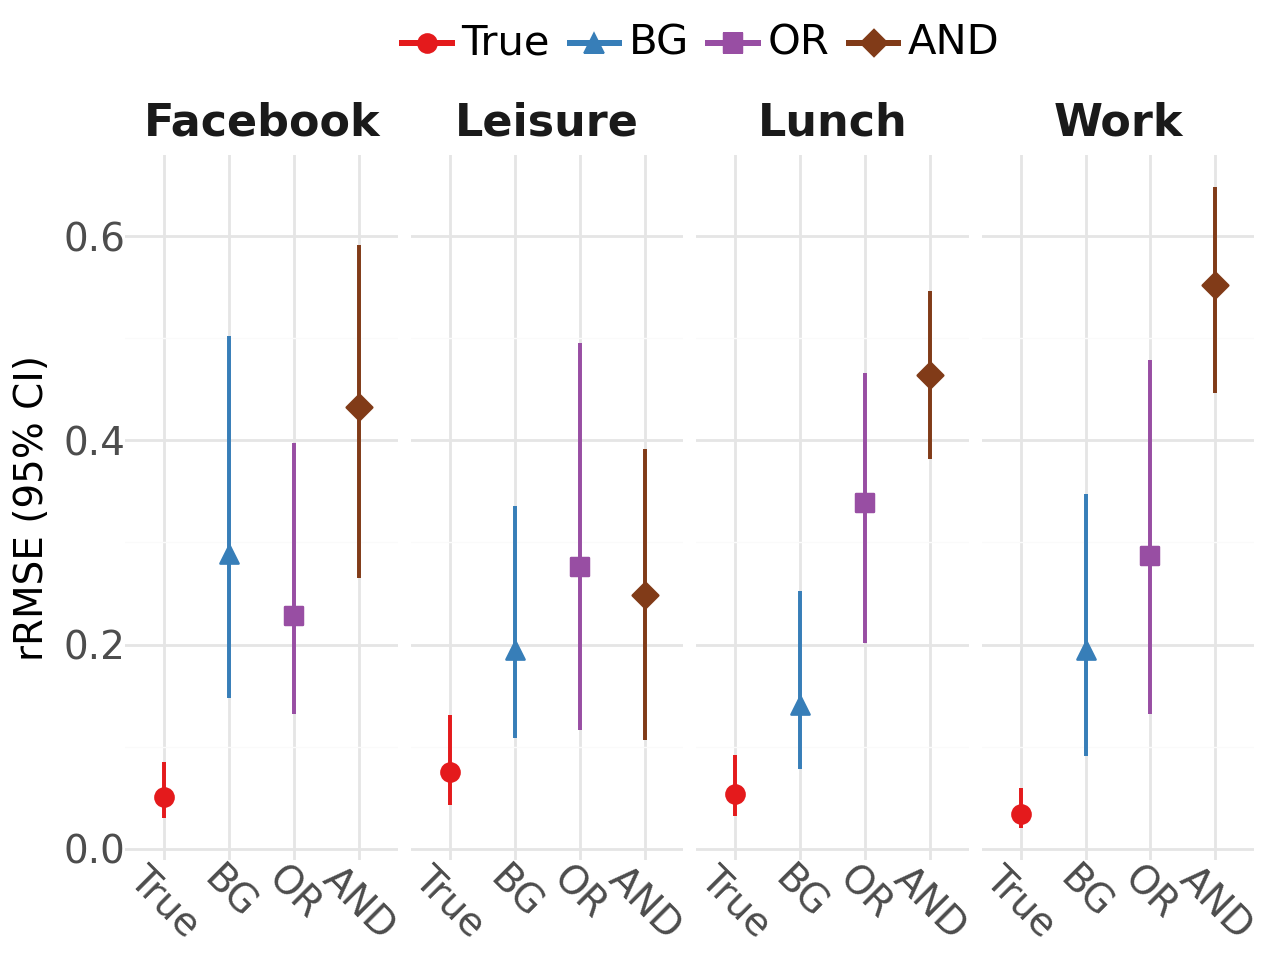

c:\Users\bar21\.conda\envs\STAT\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6 x 4 in image.
c:\Users\bar21\.conda\envs\STAT\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: Data/cs_aarhus/figs/cs_rmse_rel.png
c:\Users\bar21\.conda\envs\STAT\Lib\site-packages\plotnine\scales\scale_shape.py:82: PlotnineWarning: Using shapes for an ordinal variable is not advised.
c:\Users\bar21\.conda\envs\STAT\Lib\site-packages\plotnine\geoms\geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


In [ ]:


custom_palette = {
    "True": "#E41A1C",   # Red
    "BG": "#377EB8",        # Green
    # "BG": "#4DAF4A",        # Green
    "OR": "#984EA3",     # Purple
    "AND": "#813b18",   # Brown
}

plot = (
    p9.ggplot(summary_df, p9.aes(x="model", 
                                 y="mean_RMSE_rel", 
                                 group="model", 
                                 color="model",
                                 shape="model"))
    + p9.geom_line(position=p9.position_dodge(width=0.2), size=1.2)  
    + p9.geom_pointrange(
        p9.aes(ymin="rmse_rel_q5", ymax="rmse_rel_q95"),
        position=p9.position_dodge(width=0.2),
        size=0.8  
    )
    + p9.theme_minimal()
    # + p9.theme_bw()
    # + p9.scale_y_continuous(breaks=np.arange(0, 1.2, 0.2), limits=[0, 1])
    + p9.facet_wrap("layer", scales="fixed", ncol=4)
    + p9.labs(y="rRMSE (95% CI)", x="", color="", shape="")
    # + p9.scale_x_continuous(breaks=summary_df["gamma_noise"].unique())

    # + p9.scale_color_discrete(name="")
    + p9.scale_color_manual(values=custom_palette)
    + p9.theme(
        # legend_title=p9.element_text(size=14, weight='bold'),
        legend_text=p9.element_text(size=15),
        legend_key_size=20,
        # axis_title_x=p9.element_text(size=12,),
        axis_title_y=p9.element_text(size=14,),
        axis_text_x=p9.element_text(size=14, angle=-45),
        axis_text_y=p9.element_text(size=14),
        strip_text=p9.element_text(size=16, weight='bold'), 
        legend_position="top", 
    )
)

plot.show()

plot.save("Data/cs_aarhus/figs/cs_rmse_rel.png", dpi=300, height=4, width=6,)


c:\Users\bar21\.conda\envs\STAT\Lib\site-packages\plotnine\scales\scale_shape.py:82: PlotnineWarning: Using shapes for an ordinal variable is not advised.


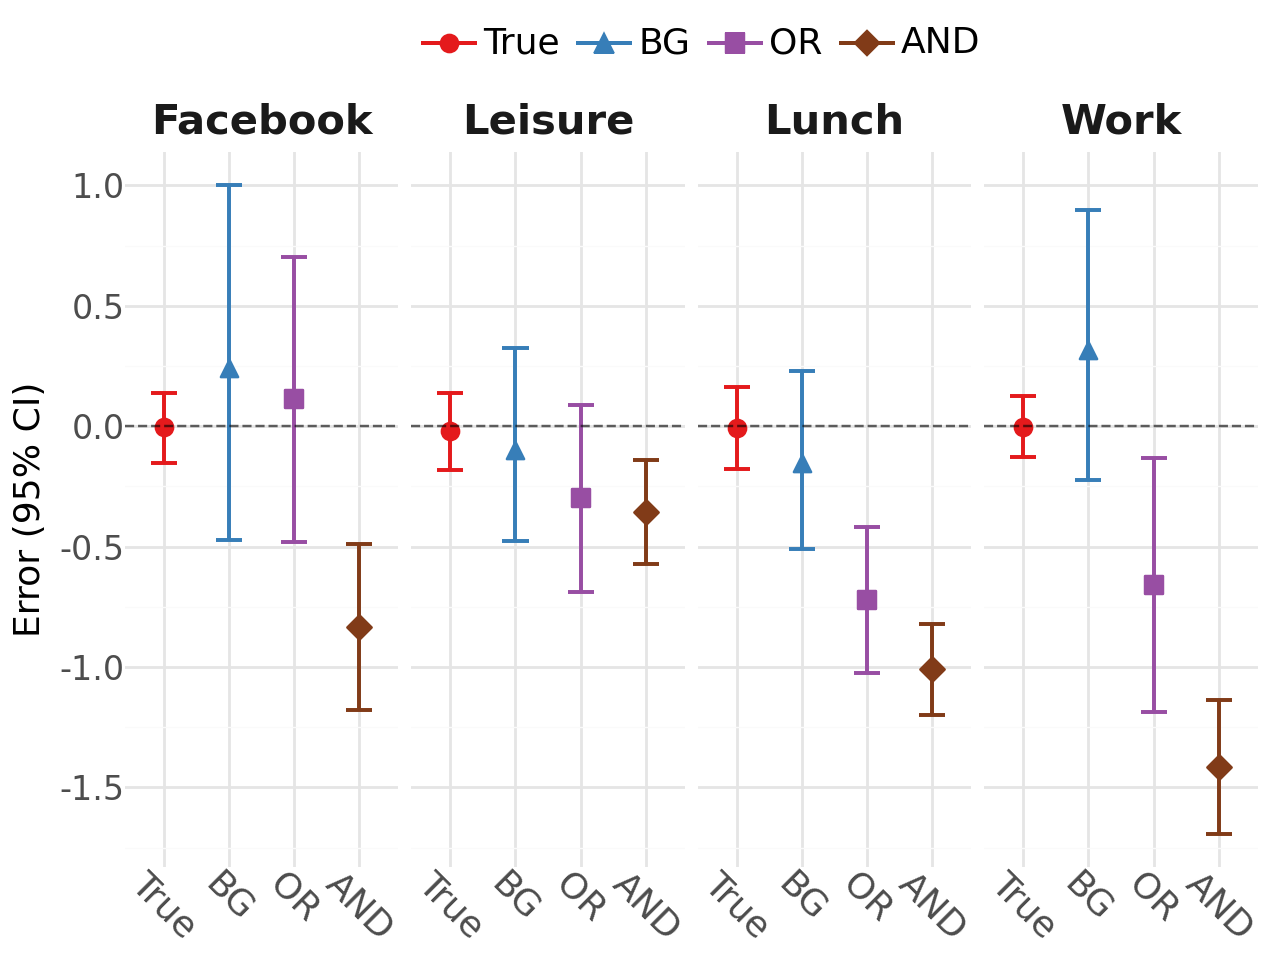

c:\Users\bar21\.conda\envs\STAT\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.5 x 4 in image.
c:\Users\bar21\.conda\envs\STAT\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: Data/cs_aarhus/figs/cs_bias_ci.png
c:\Users\bar21\.conda\envs\STAT\Lib\site-packages\plotnine\scales\scale_shape.py:82: PlotnineWarning: Using shapes for an ordinal variable is not advised.


In [61]:


summary_df["bias_q975"] = summary_df["mean_975"] - summary_df["true"]
summary_df["bias_q025"] = summary_df["mean_025"] - summary_df["true"]

summary_df["bias_perc"] = summary_df["bias"] / summary_df["true"]

summary_df["bias_perc_q975"] = summary_df["bias_q975"] / summary_df["true"]
summary_df["bias_perc_q025"] = summary_df["bias_q025"] / summary_df["true"]


ci_plot = (
    # p9.ggplot(summary_df[summary_df["model"] != "true_net"], 
    p9.ggplot(summary_df, 
                        p9.aes(x="model", 
                                y="bias", 
                                group="model",
                                color="model",
                                shape = "model"))

    + p9.geom_errorbar(
        p9.aes(ymin="bias_q025", ymax="bias_q975"),
        position=p9.position_dodge(width=0.7),
        size=0.8, width=0.4  
    )
    + p9.geom_point(size=3, 
                 position = p9.position_dodge(width=0.7))
    + p9.geom_hline(yintercept=0.0, linetype="dashed", color="black", alpha=0.6)

    # + p9.theme_bw()
    + p9.theme_minimal()

    + p9.facet_wrap("layer", scales="fixed", ncol=4)
    + p9.labs(y="Error (95% CI)", x="", color="", shape="")
    # + p9.coord_flip()
    + p9.scale_y_continuous(breaks=np.arange(-1.5, 1 + 0.01, 0.5))
    + p9.scale_color_manual(values=custom_palette)

    + p9.theme(
        # legend_title=p9.element_text(size=14, weight='bold'),
        legend_text=p9.element_text(size=13),
        legend_key_size=20,
        # axis_title_x=p9.element_text(size=12,),
        axis_title_y=p9.element_text(size=13,),
        axis_text_x=p9.element_text(size=13, angle=-45),
        axis_text_y=p9.element_text(size=12),
        strip_text=p9.element_text(size=15, weight='bold',), 
        legend_position="top", 
    )


)

ci_plot.show()

ci_plot.save("Data/cs_aarhus/figs/cs_bias_ci.png", dpi=300, height=4, width=6.5,)


In [62]:
#  Read network data

network_data = ud.network_data()

print(network_data.keys())
print(network_data["adj_mat_dict"].keys(), network_data["adj_mat_dict"]['facebook'].shape)


dict_keys(['adj_mat_dict', 'triu_dict'])
dict_keys(['lunch', 'facebook', 'leisure', 'work']) (61, 61)


In [ ]:
# print statistics of the networks

layers = list(network_data["adj_mat_dict"].keys())

for layer in layers:
    print("-" * 40)
    print(f"Layer : {layer}")
    print("n_edge:", network_data["adj_mat_dict"][layer].sum()/2)
    deg = network_data["adj_mat_dict"][layer].sum(axis=1)
    avg_deg = deg[deg > 0].mean()
    print("avg_deg (>0):", avg_deg)
    print("ave_deg:", network_data["adj_mat_dict"][layer].sum(axis=1).mean())
    n_not_connected = (deg == 0).sum()
    print("n_not_connected:", n_not_connected)
    print("-" * 40)

----------------------------------------
Layer : lunch
n_edge: 193.0
avg_deg (>0): 6.433334
ave_deg: 6.3278685
n_not_connected: 1
----------------------------------------
----------------------------------------
Layer : facebook
n_edge: 124.0
avg_deg (>0): 7.75
ave_deg: 4.0655737
n_not_connected: 29
----------------------------------------
----------------------------------------
Layer : leisure
n_edge: 88.0
avg_deg (>0): 3.7446806
ave_deg: 2.8852458
n_not_connected: 14
----------------------------------------
----------------------------------------
Layer : work
n_edge: 194.0
avg_deg (>0): 6.466667
ave_deg: 6.3606553
n_not_connected: 1
----------------------------------------


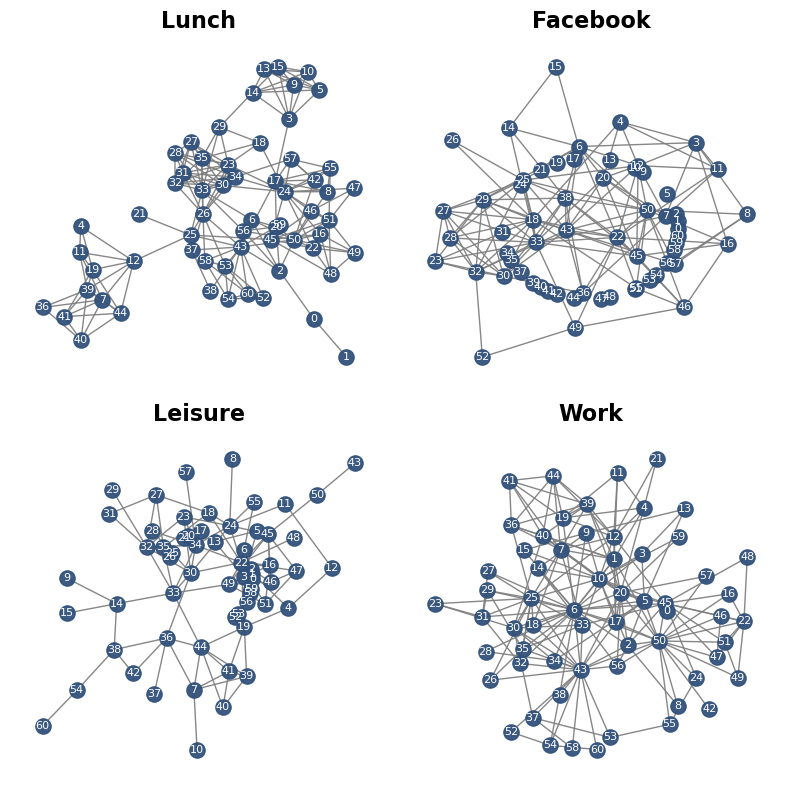

In [119]:
from torch import alpha_dropout


capitalized_layers = [layer.capitalize() for layer in layers]

# fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14, 4))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
axes = axes.flatten()
for i in range(4):
# for layer in networks_dict.keys():
    degs = network_data["adj_mat_dict"][layers[i]].sum(axis=1) + 1
    G = nx.from_numpy_array(np.array(network_data["adj_mat_dict"][layers[i]]))
    # pos = nx.circular_layout(G)
    pos = nx.kamada_kawai_layout(G)
    nx.draw_networkx(
        G,
        pos=pos,
        ax=axes[i],
        node_size=120,
        # node_size=degs*5 + 10,
        with_labels=False,
        edge_color='gray',
        # node_color = "#00008B",
        node_color = "#32527b",
        alpha=0.95
    )

    # Add node labels (Node IDs)
    labels = {node: str(node) for node in G.nodes()}  # Convert IDs to strings
    nx.draw_networkx_labels(G, pos, labels=labels, ax=axes[i], font_size=8, 
                            font_color="white")

    axes[i].set_title(f"{capitalized_layers[i]}", fontsize=16, color='black', fontweight='bold')
    axes[i].axis('off')
plt.tight_layout()

plt.savefig("Data/cs_aarhus/figs/cs_networks.png", dpi=300)

plt.show()

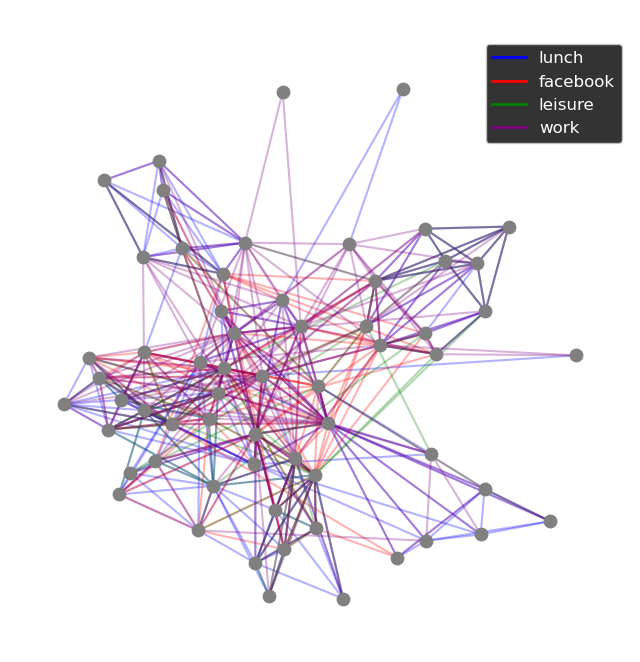

In [ ]:
# plot networks


# Define colors for each layer
layer_colors = {
    "lunch": "blue",
    "facebook": "red",
    "leisure": "green",
    "work": "purple"
}

# Create MultiGraph to allow multiple edges
G_combined = nx.MultiGraph()

# Add all edges from each layer, keeping duplicates
for layer in layers:
    G_layer = nx.from_numpy_array(np.array(network_data["adj_mat_dict"][layer]))
    for edge in G_layer.edges():
        G_combined.add_edge(edge[0], edge[1], layer=layer)

# Compute node positions using Fruchterman-Reingold layout (or Kamada-Kawai)
pos = nx.spring_layout(G_combined, seed=150)
# pos = nx.circular_layout(G_combined)

# Create figure
fig, ax = plt.subplots(figsize=(8, 8))

# Draw multi-edges separately for each layer
for layer in layers:
    edges = [(u, v) for u, v, d in G_combined.edges(data=True) if d["layer"] == layer]
    nx.draw_networkx_edges(G_combined, pos, edgelist=edges, edge_color=layer_colors[layer], alpha=0.3, width=1.5)

# Draw nodes
nx.draw_networkx_nodes(G_combined, pos, node_size=80, node_color="gray")

# Add legend
legend_labels = [plt.Line2D([0], [0], color=layer_colors[layer], lw=2, label=layer) for layer in layers]
plt.legend(handles=legend_labels, loc="upper right", fontsize=12)

ax.set_title("Multilayer Network (Multi-Edges Enabled)", fontsize=16, fontweight="bold")
ax.axis("off")

plt.show()